# EasyVisa Project

## Problem Statement

### Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

 

### Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

#Libraries for reading and manipulating data
import numpy as np
import pandas as pd

#Library to split data
from sklearn.model_selection import train_test_split

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

#Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


#Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

#To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset 

In [2]:
visa = pd.read_csv('EasyVisa.csv')

In [3]:
#Make a copy of the data to avoid changes to the original
data = visa.copy()

## Overview of the Dataset 

### First and last 5 rows of the dataset 

In [4]:
#First 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
#Last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Shape of the dataset 

In [6]:
data.shape

(25480, 12)

### Datatypes for the dataset 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


9 of the 12 columns of data are objects (categories), while the other 3 are numeric 

In [8]:
data.duplicated().sum()

0

## Exploratory Data Analysis 

#### Statistical summary of the dataset 

In [9]:
#For the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [10]:
#For the categorical variables
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* We can see that the the minumum number of employees is a negative number, which needs to be fixed. However, we can see that the this distribution is skewed to the right since the mean is greater than the median 
* The average year on which the employer's company was established was in the 1980s
* The average wage is greater than the median wage, which indicates it is skewed to the right, as well as the 25th percentile making around 108,000 a year

In [11]:
#Absolute values of those number of employees
data['no_of_employees'] = np.absolute(data['no_of_employees'])

In [12]:
data['no_of_employees']

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

#### Check the count of each unique category in each of the categorical variables

In [13]:
cat_col = list(data.select_dtypes('object').columns)

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [14]:
#Dropping case id as it is NOT relevant
data.drop('case_id',axis=1,inplace=True)

### Univariate Analysis 

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations for the number of employees 

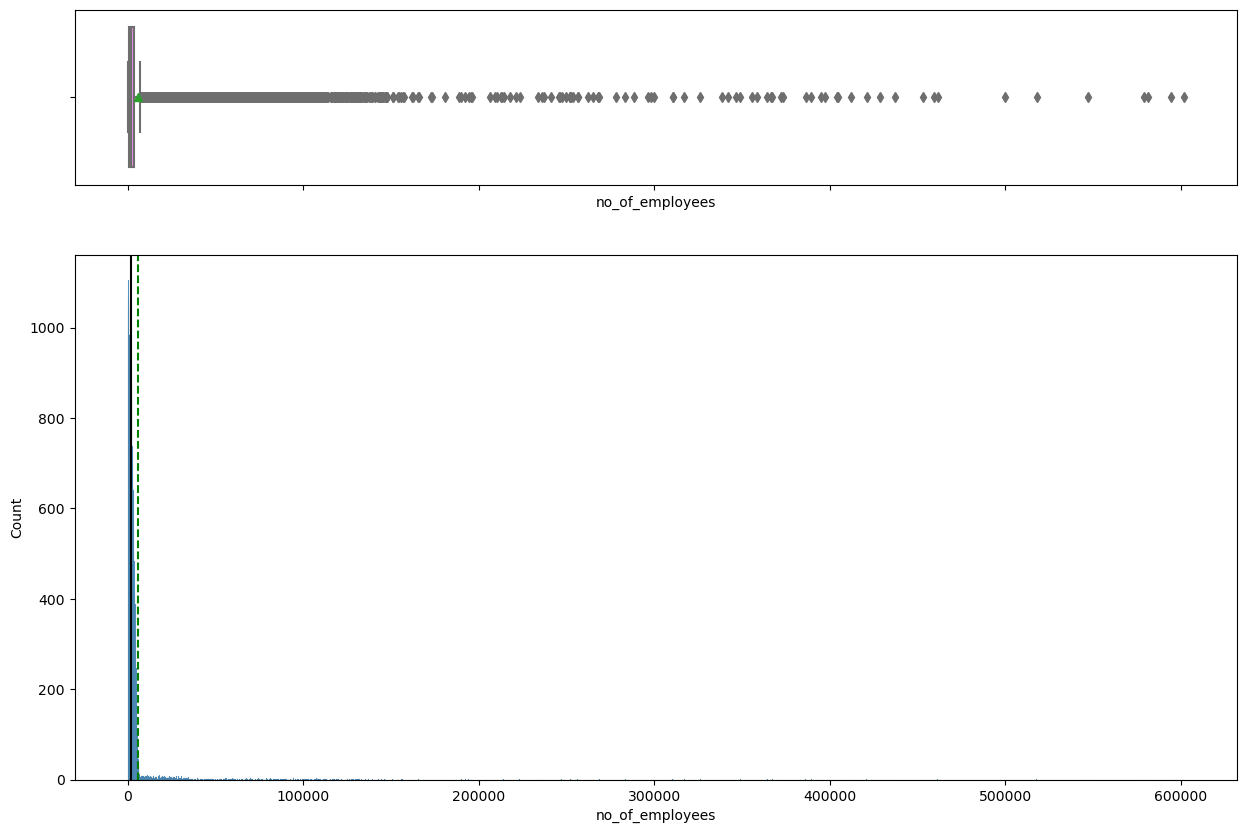

In [16]:
histogram_boxplot(data,'no_of_employees')

#### Observations on year prevailing wage

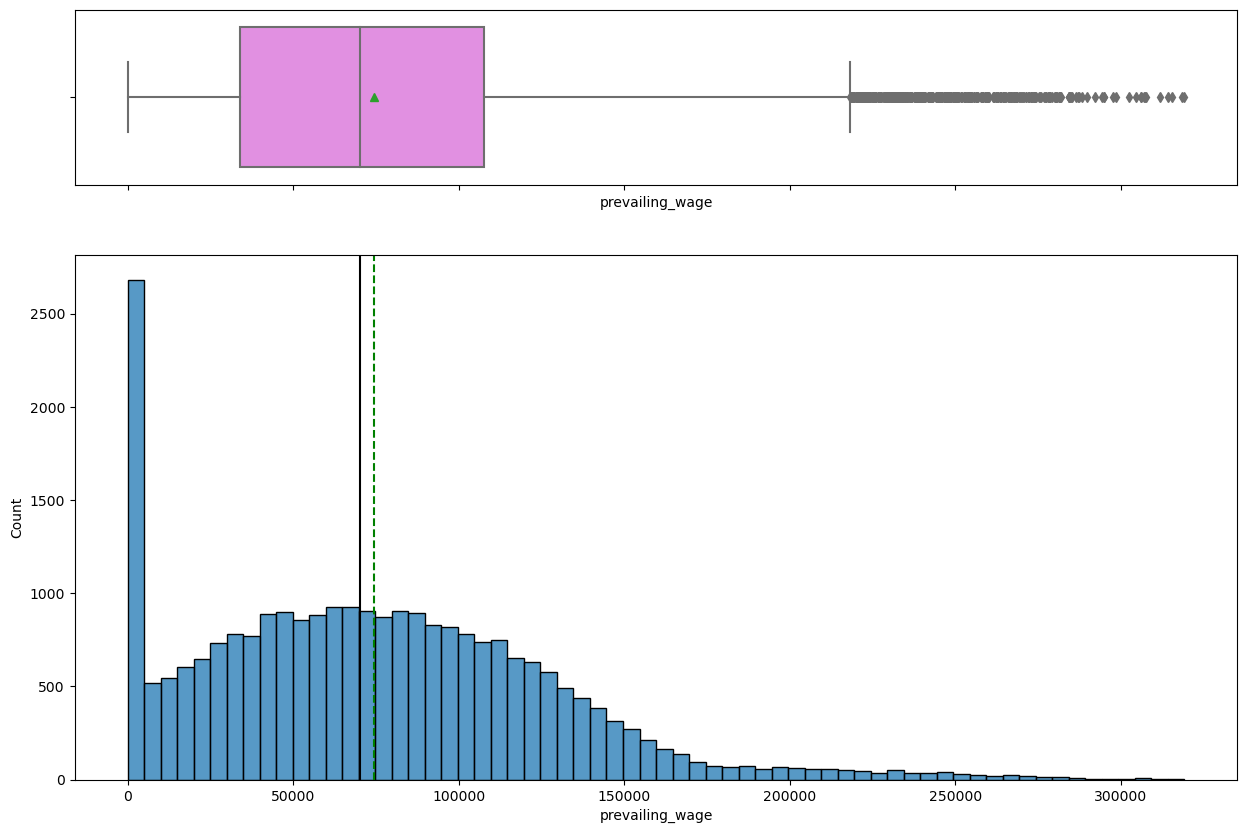

In [17]:
histogram_boxplot(data,'prevailing_wage')

As predicted this histogram is skewed to the right, and there seems to be many outliers in the boxplot

In [18]:
#Checkng the observations on which have less than 100 prevailing wages
data.loc[data['prevailing_wage']<100].shape

(176, 11)

In [19]:
#Checking it with unit of wage
data.loc[data['prevailing_wage']<100,'unit_of_wage'].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

In [20]:
#Creating a function for labeled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

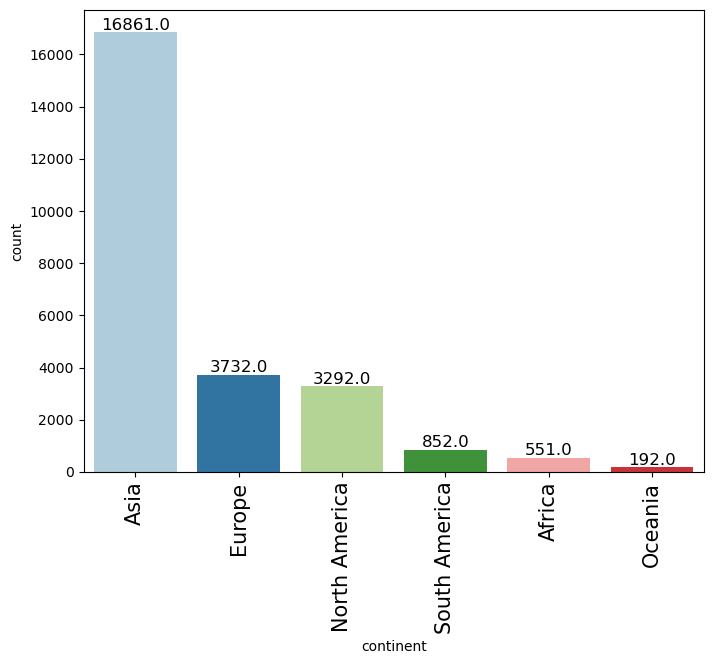

In [21]:
labeled_barplot(data,'continent')

Majority of the immigrants wanting a visa are coming from Asia and Europe

#### Observations on education of employment 

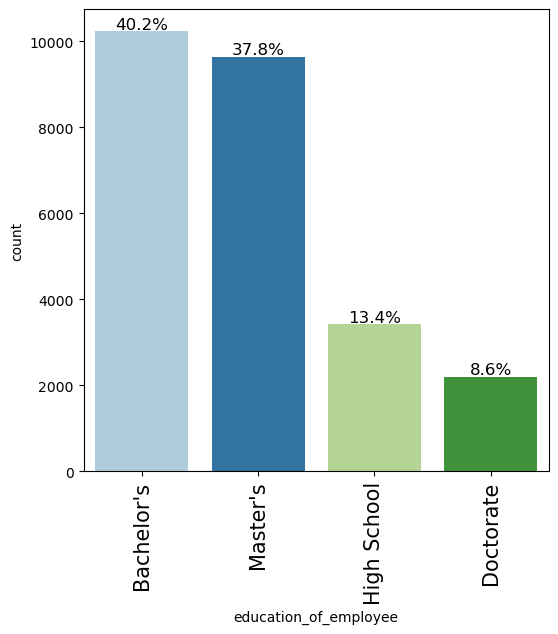

In [22]:
labeled_barplot(data,'education_of_employee',perc=True)

Majority of the immigrants have either a bachelors or masters, around 40% of them have a bachelors and 38% have a masters 

#### Observation on job experience

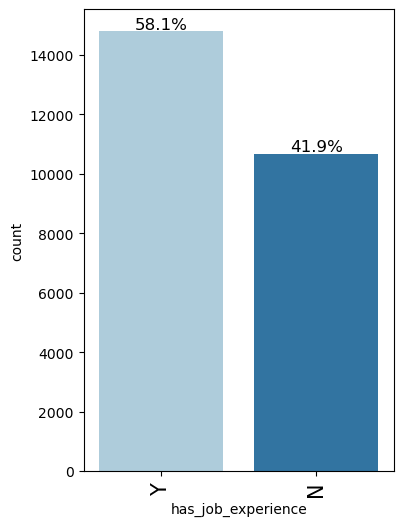

In [23]:
labeled_barplot(data,'has_job_experience',perc=True)

#### Observations on job training 

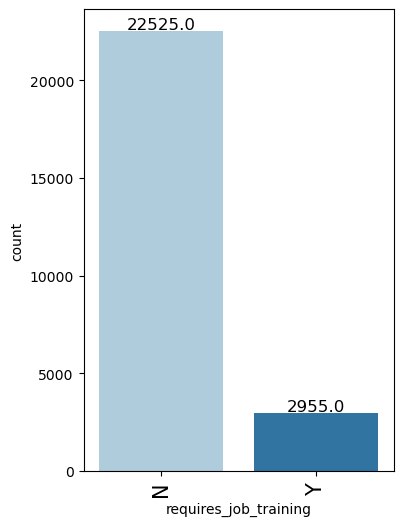

In [24]:
labeled_barplot(data,'requires_job_training')

#### Observation on region of employment 

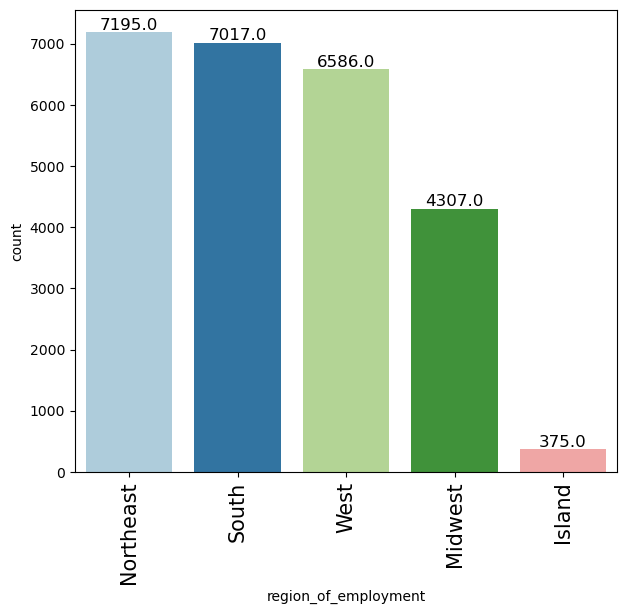

In [25]:
labeled_barplot(data,'region_of_employment')

#### Observations on the units of wage  

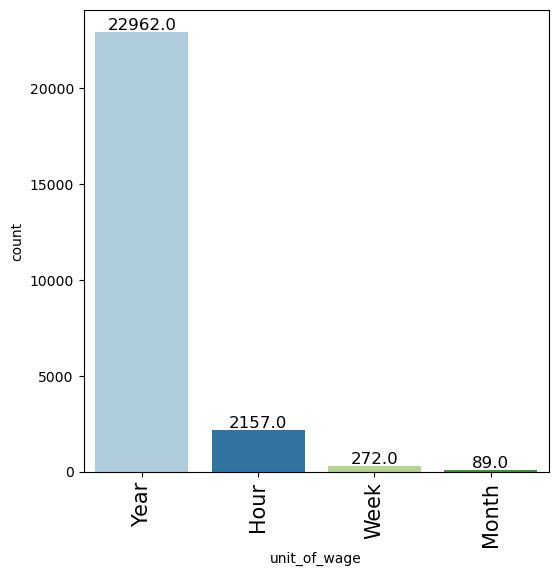

In [26]:
labeled_barplot(data,'unit_of_wage')

#### Observations on case status 

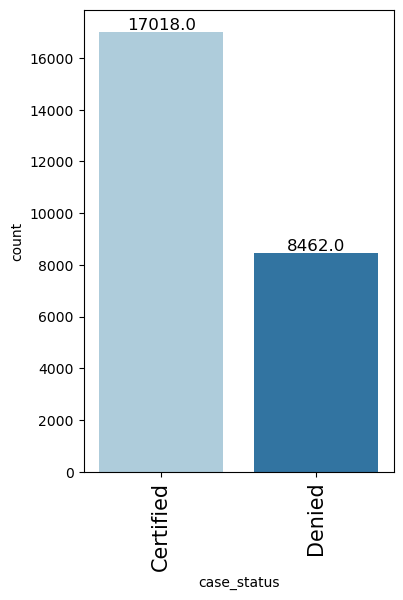

In [27]:
labeled_barplot(data,'case_status')

### Bivariate Analysis 

#### Correlation Heatmap 

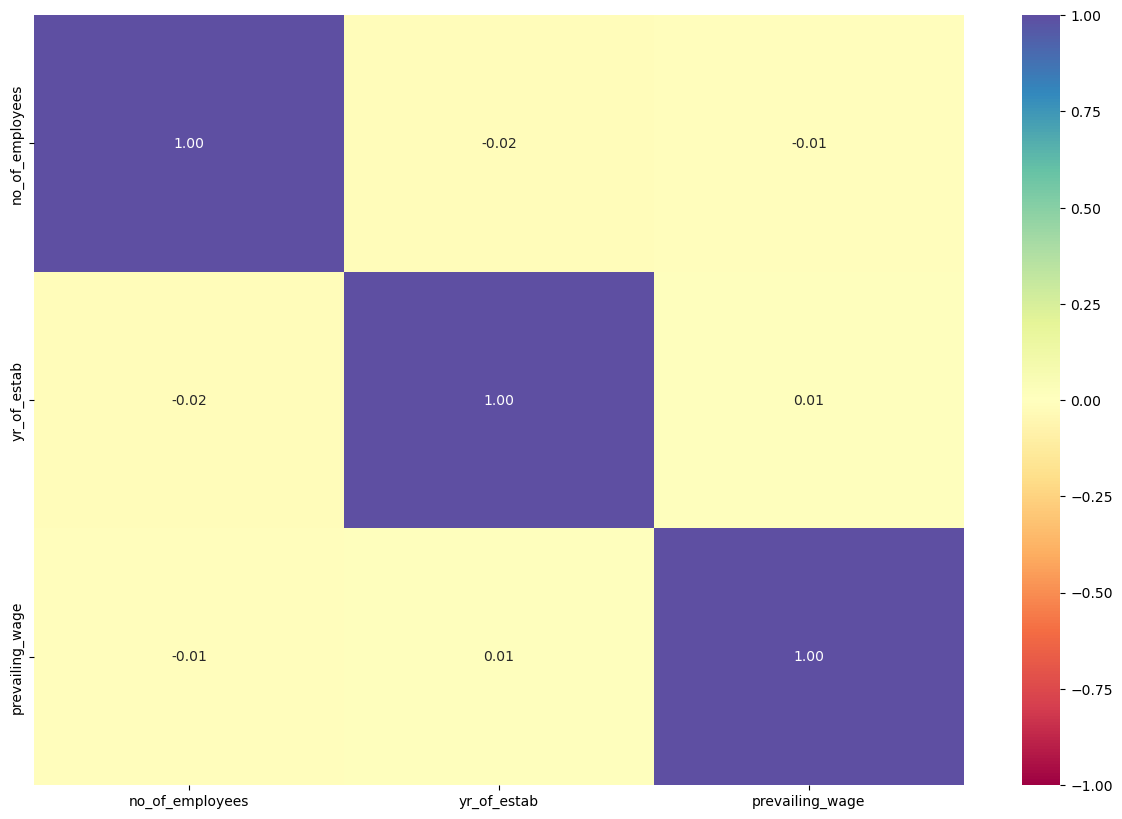

In [28]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))
sns.heatmap(data[numerical_cols].corr(),vmin=-1,vmax=1,fmt='.2f',annot=True,cmap='Spectral')
plt.show()

None of the numerical columns have a correlation with each other

In [29]:
#Function for distribution plots
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [30]:
#Stacked barplot
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does education have any impact on visa certification 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


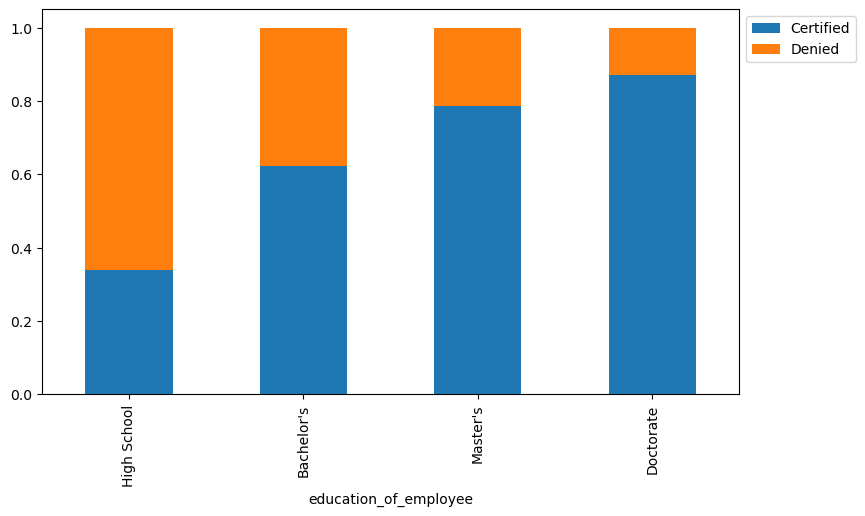

In [31]:
stacked_barplot(data,'education_of_employee','case_status')

The higher the education the higher the chances you have of getting a certified visa

#### Different regions have an affect on visa status 

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


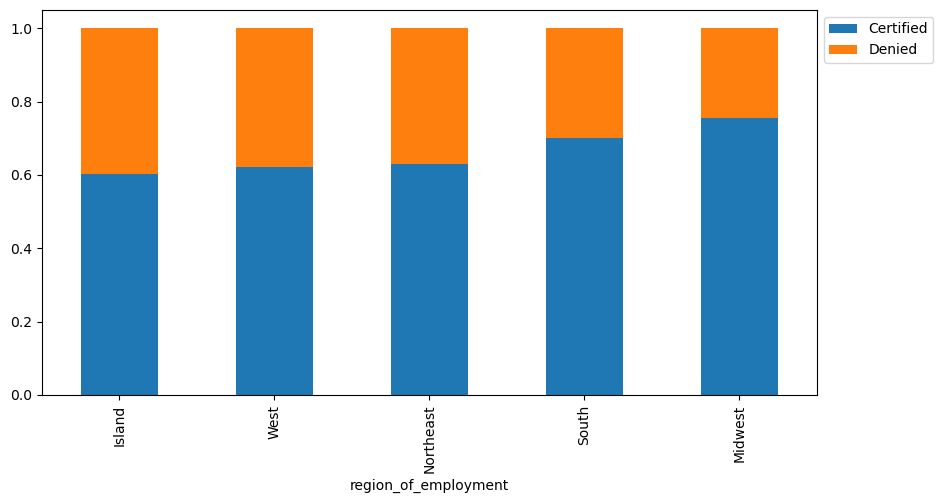

In [32]:
stacked_barplot(data,'region_of_employment','case_status')

If an immigrant wants to work in the Southern part or in the midwest, they will most likely get accepted

#### Does their continent have any affect on their visa status? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


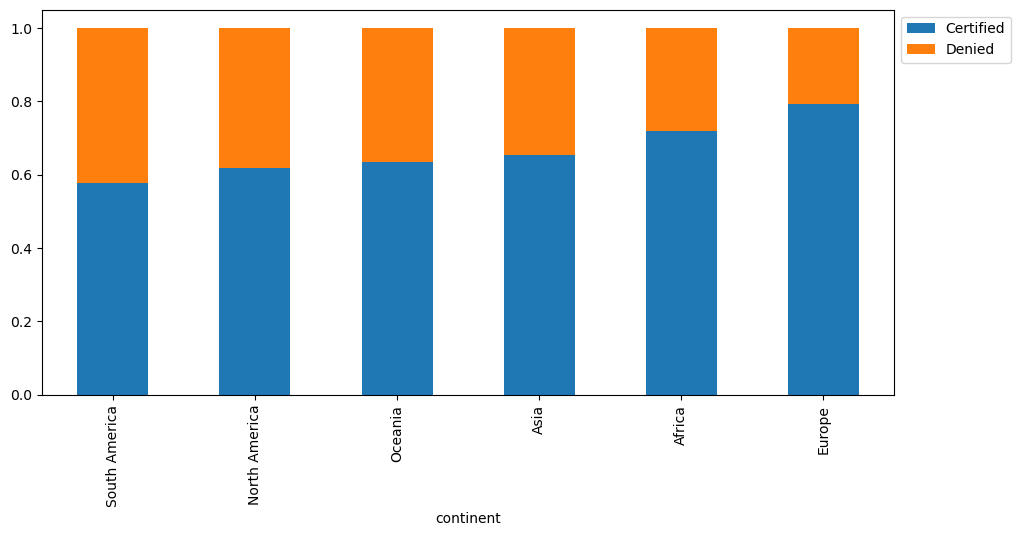

In [33]:
stacked_barplot(data,'continent','case_status')

They are more likely to be accepted visa if they are from Europe, Africa, and Asia

#### What affect does work experience have on visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


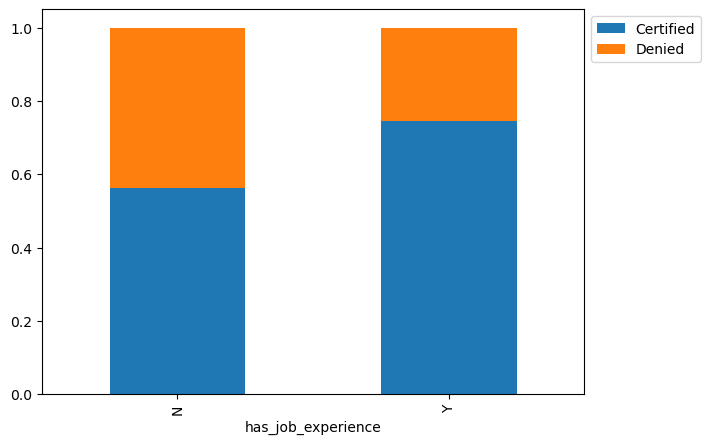

In [34]:
stacked_barplot(data,'has_job_experience','case_status')

You are more likely to get accepted for the job if you have on the job experience

#### Do any people who have experience require on the job training? 

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


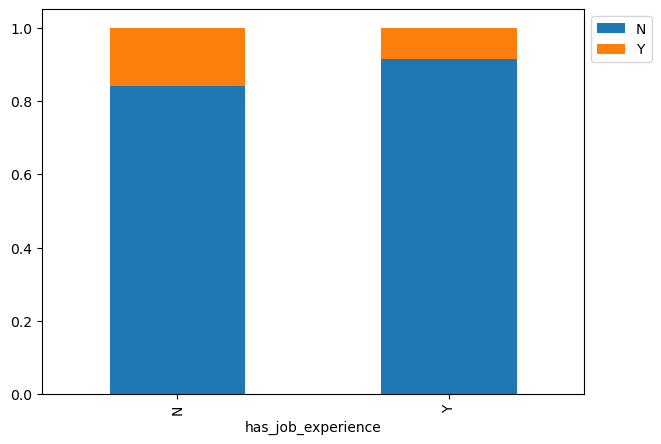

In [35]:
stacked_barplot(data,'has_job_experience','requires_job_training')

#### Does visa status change with prevailing wage?

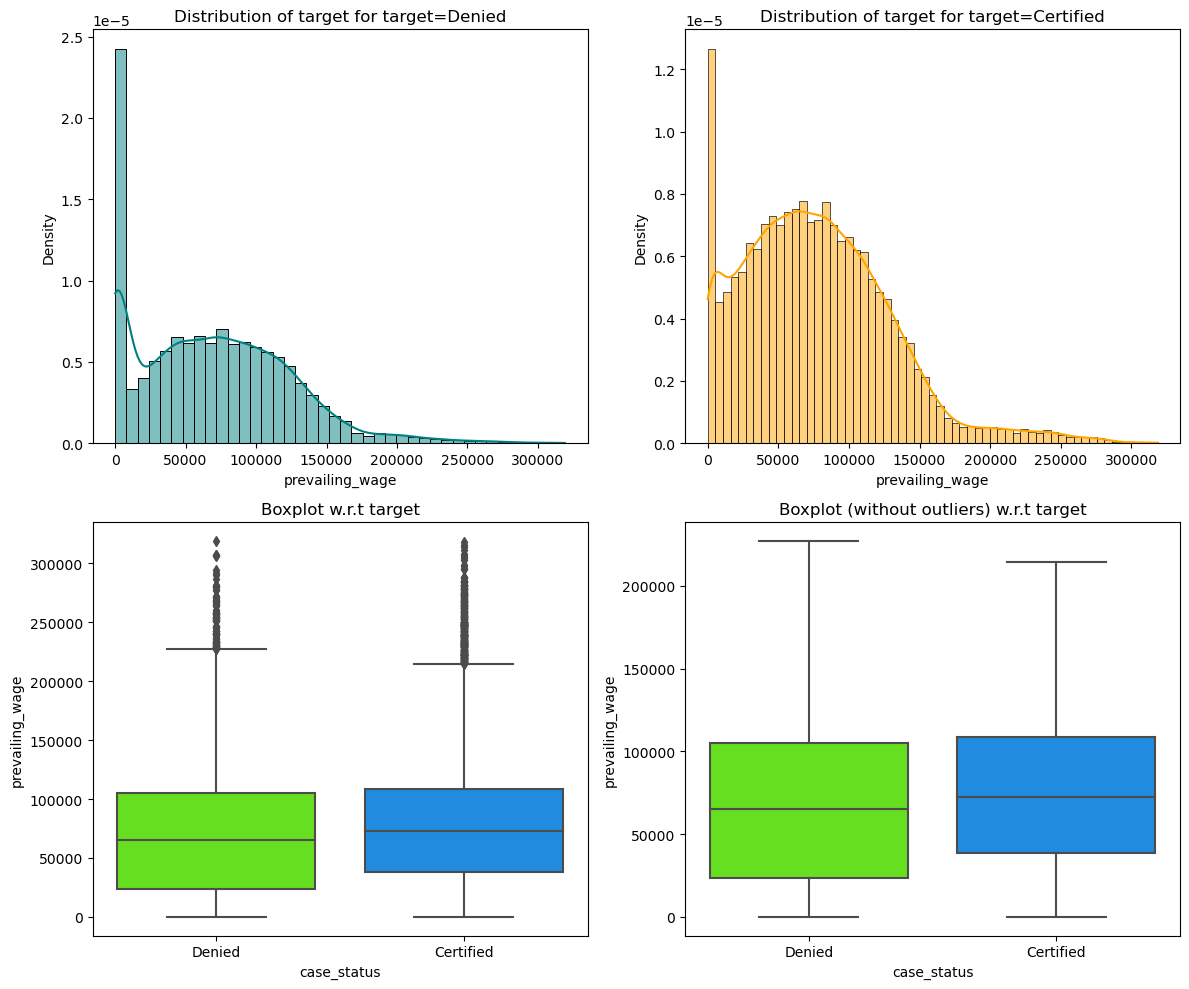

In [36]:
distribution_plot_wrt_target(data, 'prevailing_wage','case_status')

This comes to show that the United States that the higher the wage is, the more likely they will be denied

#### Which regions offer the higher wages in the United States? 

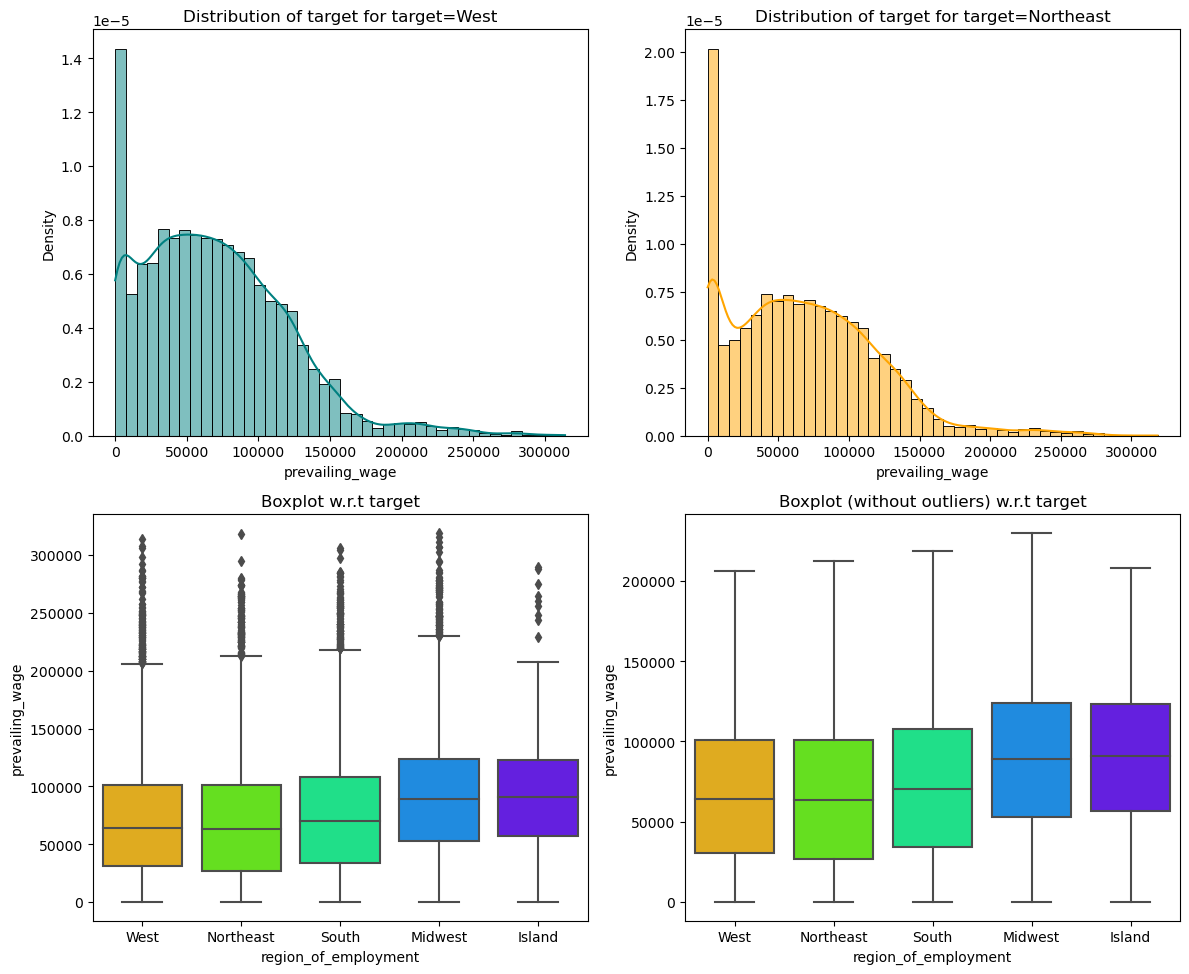

In [37]:
distribution_plot_wrt_target(data, 'prevailing_wage','region_of_employment')

Region of employment is more likely to be accepted if it is in the South and the Midwest, as they offer the lowest wage

## Data Preprocessing 

### Outlier Check

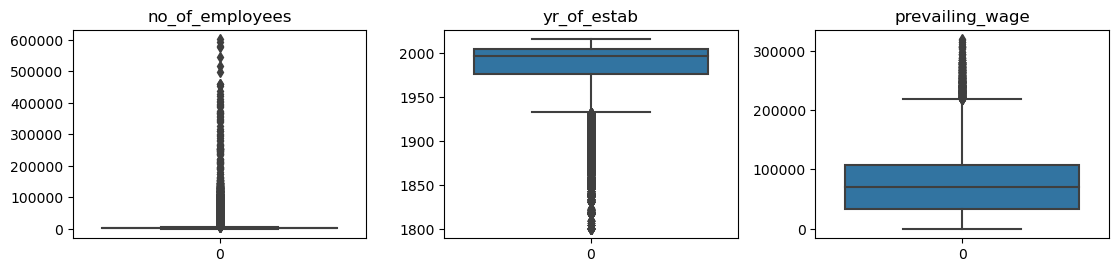

In [38]:
#Outlier Detection function 
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))

for i, variable in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Seems to be outliers, but they are part of the dataset

### Data Preprocessing

In [39]:
data['case_status'] = data['case_status'].apply(lambda x: 1 if x=='Certified' else 0)

#Creating the independent and dependent variables
X = data.drop('case_status',axis=1)
y = data['case_status']

#Dummy variables
X = pd.get_dummies(X,drop_first=True)

#Splitting them into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [40]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


### Functions for different metrics used 

In [41]:
#Functions for different metrics 
def model_performance_classification_sklearn(model,predictors,target):
    #Predicting using independent variables
    pred = model.predict(predictors)
    
    #Metrics used
    acc = accuracy_score(target,pred) #To compute the accuracy score
    recall= recall_score(target,pred) #To compute the recall score
    precision = precision_score(target,pred) #To compute the precision score
    f1 = f1_score(target,pred) #To predict the f-1 score
    
    #Creating the dataframe for the metrics
    df_perf = pd.DataFrame(
        {'Accuracy':acc,'Recall':recall,'Precision':precision,'F1':f1,},
                          index=[0],)
    
    return df_perf

In [42]:
#Function for the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decison Tree - Model Building 

### Decision Tree Model

In [43]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

####  Checking model performance on training set

In [44]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train,y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


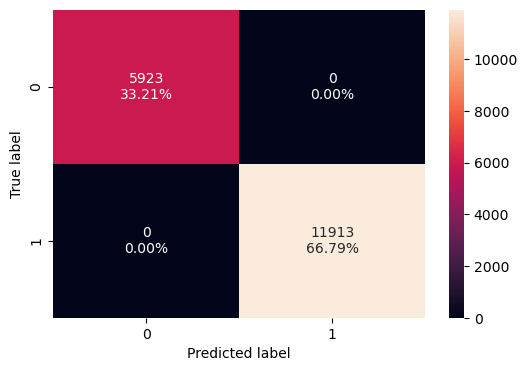

In [45]:
confusion_matrix_sklearn(model,X_train,y_train)

#### Checking performance on the test set  

In [46]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


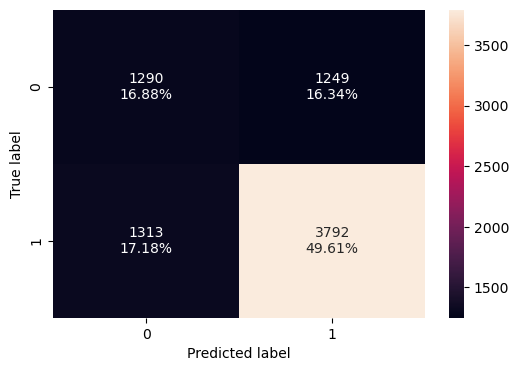

In [47]:
confusion_matrix_sklearn(model,X_test,y_test)

* The Decision Tree is overfitting, because the training data says that all metrics are perfect, while the test set not so much.
* The predictions are also off, since there are more false positives and negatives occuring within the test set 

### Decision Tree Hyperparameter Tuning

In [48]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer) 
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking model performance on training data

In [49]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


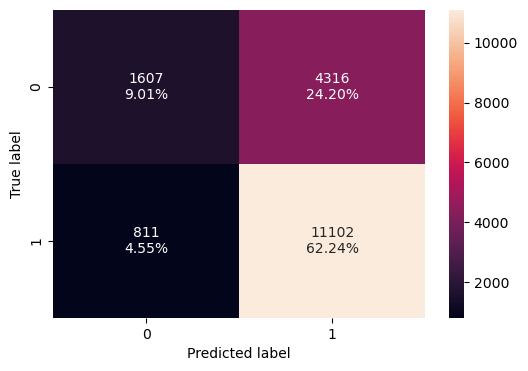

In [50]:
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

#### Checking performance on test set 

In [51]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


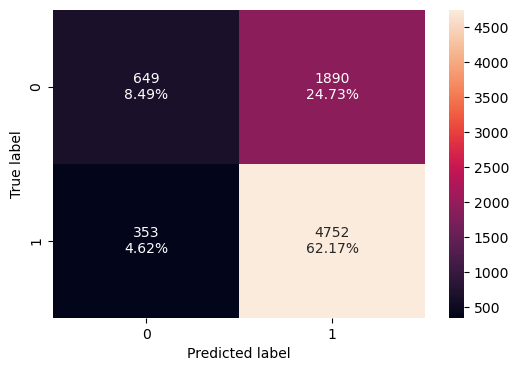

In [52]:
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The decision tree after being tuned does not seem to be overfitting, but there is still a low accuracy and precision score. Let's try to fix that by using some bagging techniques

## Bagging Model - Model Building

### Bagging Model 

In [53]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Check model performance on training set 

In [54]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


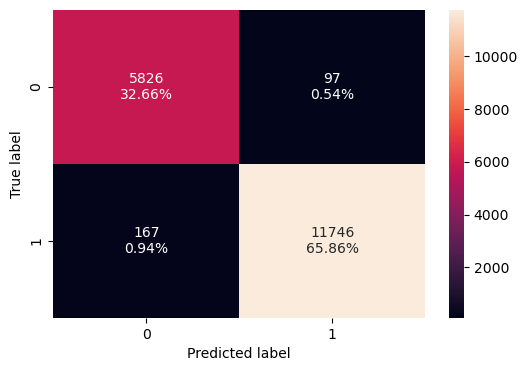

In [55]:
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

#### Check model performance on test set 

In [56]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


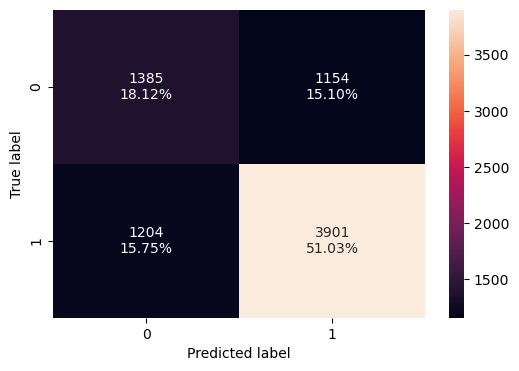

In [57]:
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* We can see that the training set has given better results in regards to metrics and predictability, however the test set does not produce the same results, therefore it is overfitting. Let's try tuning the data to get better results

### Bagging Classifier Hyperparamater Tuning 

In [58]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer)  
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Check model performance for training set 

In [59]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


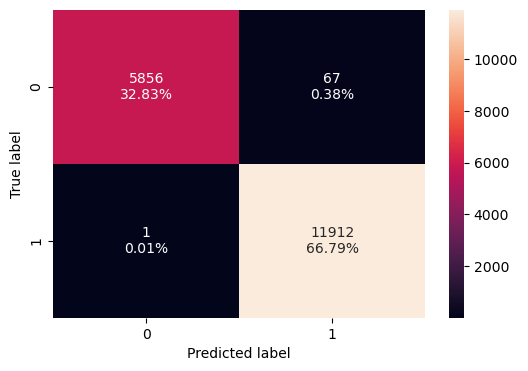

In [60]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

#### Check model performance on test set 

In [61]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


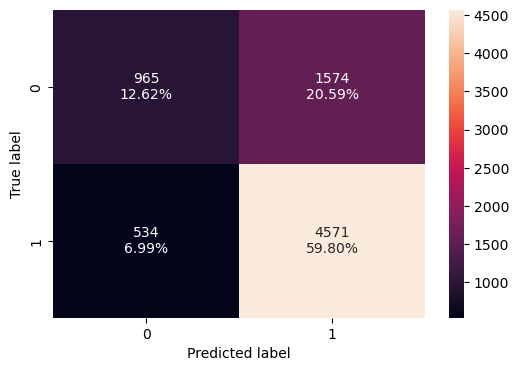

In [62]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* There is still overfitting in the data and the accuracy has fallen

## Random Forest - Model Building 

### Random Forest Model  

In [63]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Check model performance on training set

In [64]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


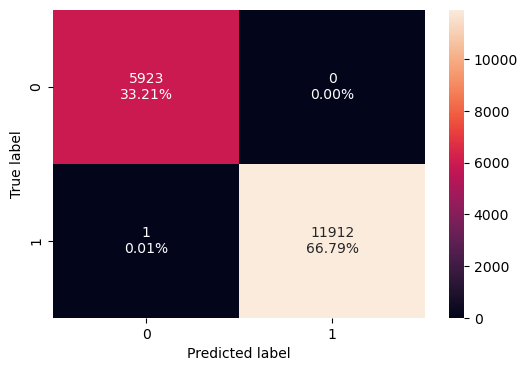

In [65]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

#### Check model performance on test set

In [66]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


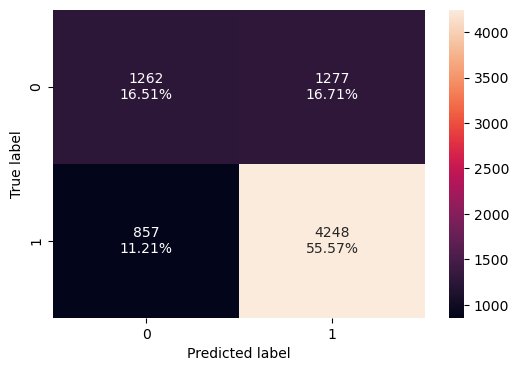

In [67]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

### Random Forest Hyperparameter Tuning

In [68]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer) 
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Check model performance on training set 

In [69]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


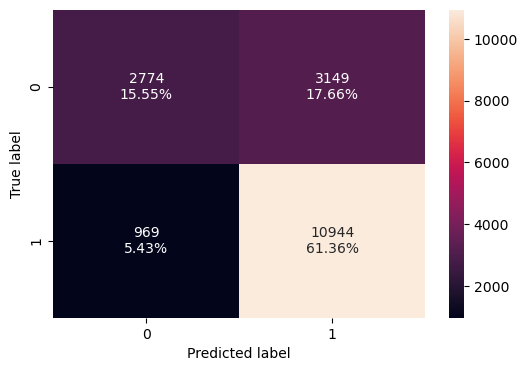

In [70]:
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

#### Check model performance on test set 

In [71]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


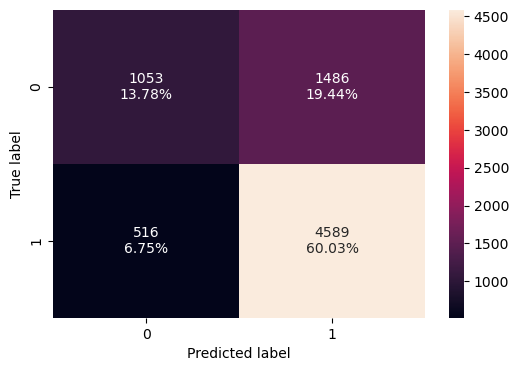

In [72]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* It is fitting both, however the scores are very low

## AdaBoosting - Model Building 

### AdaBoosting Model 

In [73]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Check Model performance for training set 

In [74]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


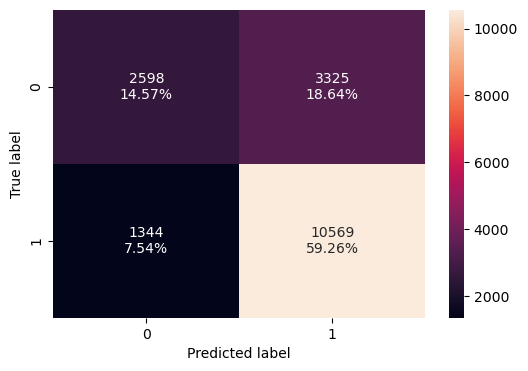

In [75]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

#### Check model performance for test set 

In [76]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


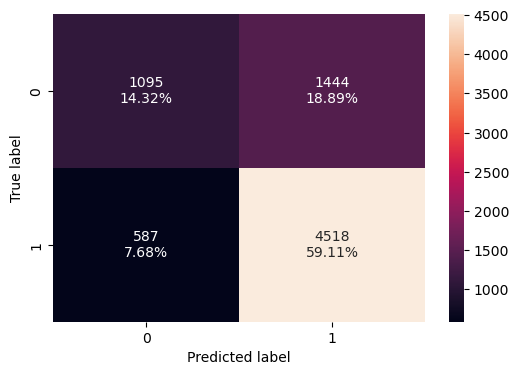

In [77]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

There seems to be no overfitting problem, but precision accuracy score could be improved, as well as predictability

### AdaBoosting Hyperparamter Tuning 

In [78]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Check model performance on training set

In [79]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


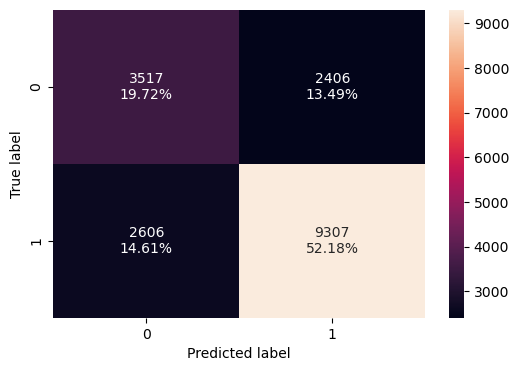

In [80]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

#### Check model performance for test set

In [81]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


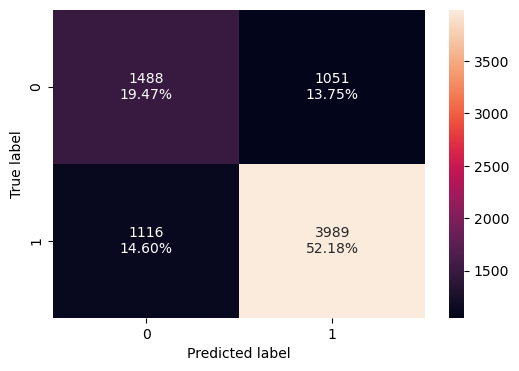

In [82]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

The metrics took a major toll, but it is overfitting, improving the overall bias of the model

## Gradient Boosting - Model Building

### Gradient Boosting Classifier Model 

In [83]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Check model performance for training set 

In [84]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


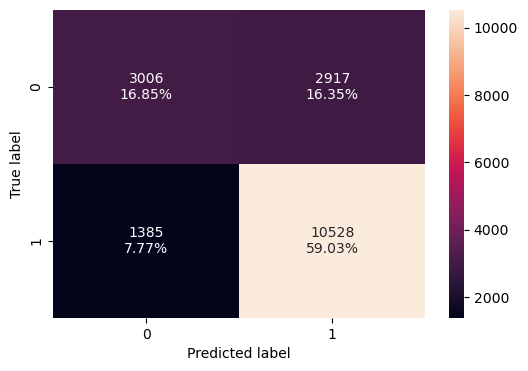

In [85]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

#### Check model performance for training set 

In [86]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


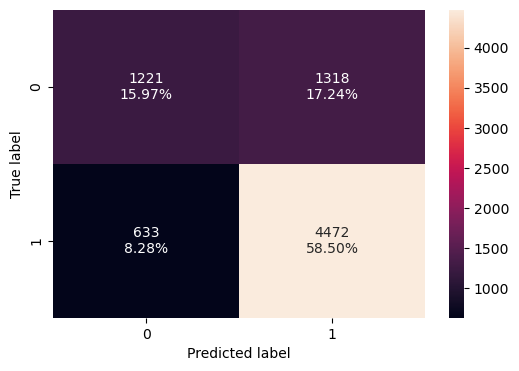

In [87]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Seems like that the recall score has increased significantly in comparison to Ada Boosting, let's see if we tune the tree to improve the overall metrics of the tree as well as predictability

### Gradient Boosting Hyperparameter Tuning 

In [88]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Check model performance for training set 

In [89]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) 
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


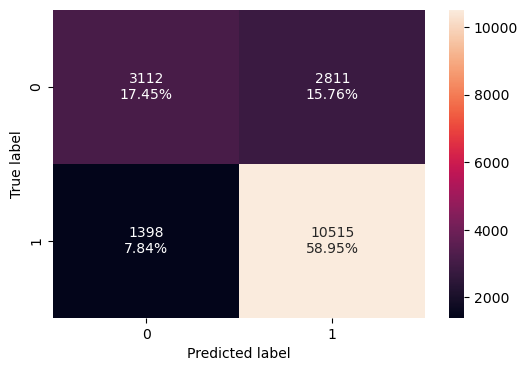

In [90]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

#### Check model performance on test set 

In [91]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) 
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


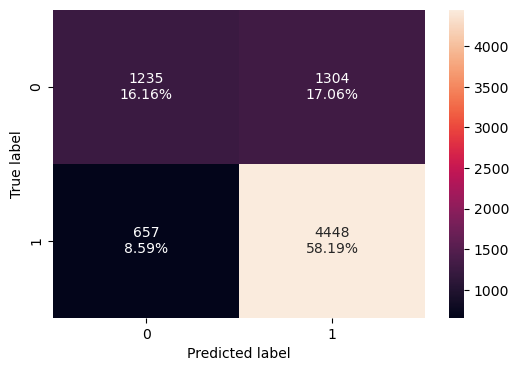

In [92]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

There is no overfitting in this model, but accuracy and precision could be better

## Stacking - Model Building

In [97]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = rf_tuned

stacking_classifier =  StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                  

## Model Evaluation and Final Model Selection

In [94]:

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234


In [95]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.743459
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.871303
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.773296
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.819379


the tuned random forest model is the best model to use for this data because of the fact that it is the most overfitting data that maintains a relatively high recall score between the test and training set

### Important Features

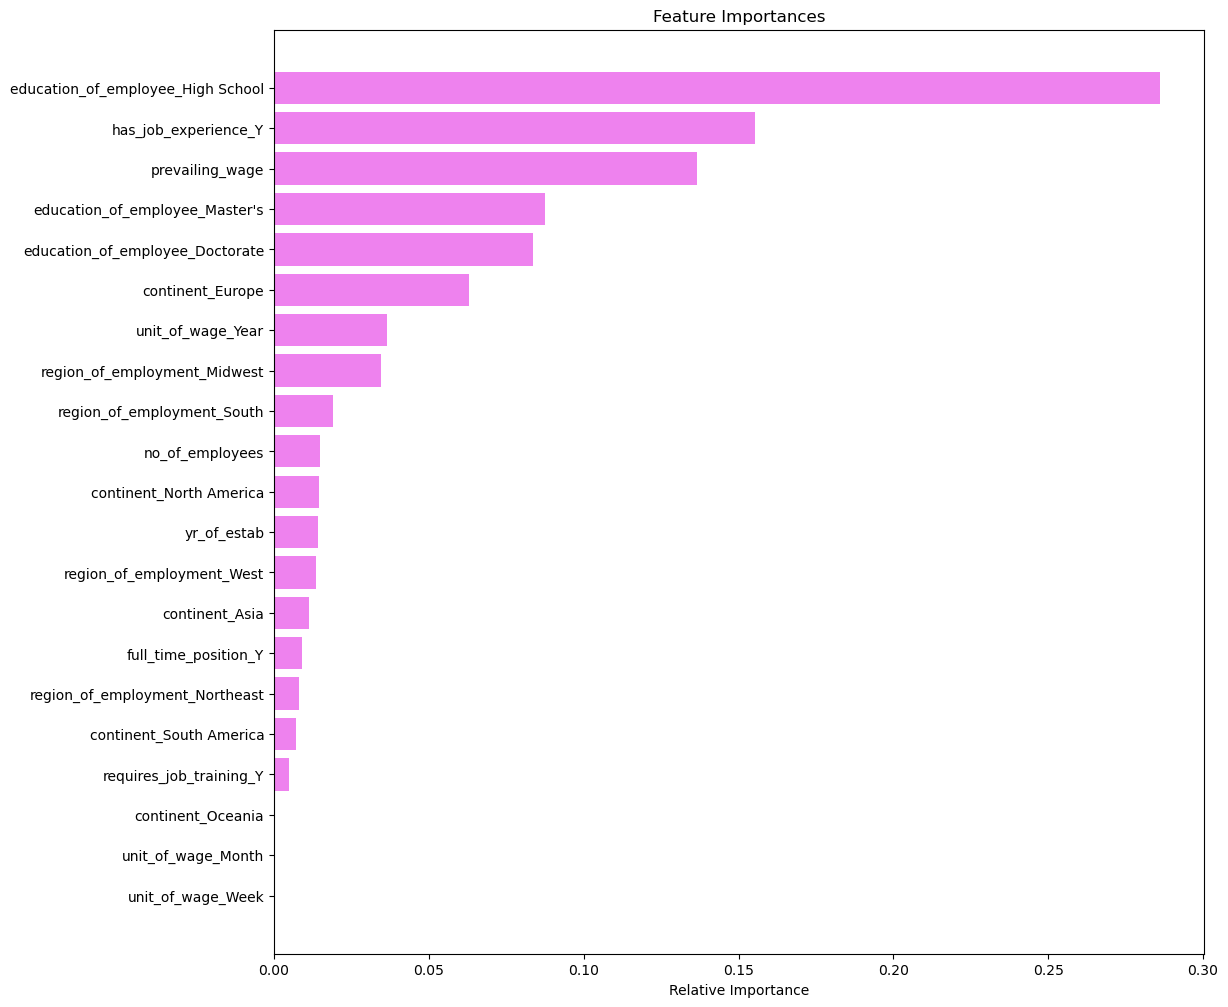

In [98]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Insights and Recommendations 

* Although the chances of your case_status of being rejected is still low despite the continent you are emigrating from, the little uptick from the Asian, European, and African countries indicate that the US government probably picks based on education, job experience, and diversity, diversity influenceing their skillsets that can give them a productive workforce
* The higher the education, the more likely your visa will be accepted and the more on the job training you need, the less likely your visa is to be accepted. So education is an important factor in your visa acceptance
* Since the cheapest wages are offered in the south and the midwest, these regions of the United States will more likely get the more influx of immigrants, therefore your visa is more likely to be accepted